
--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

--- Null Values ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin      

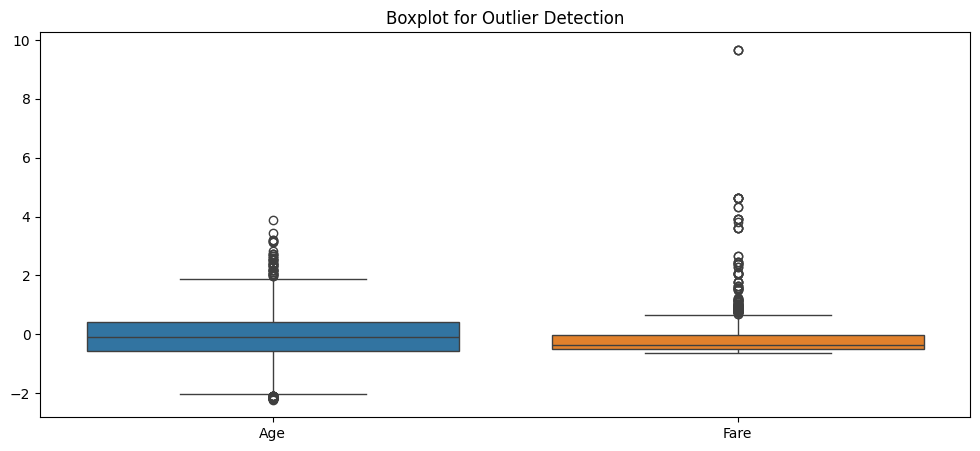


--- Cleaned Dataset Preview ---
   PassengerId  Survived  Pclass  Sex       Age  SibSp  Parch      Fare  \
0            1         0       3    1 -0.565736      1      0 -0.502445   
2            3         1       3    0 -0.258337      0      0 -0.488854   
3            4         1       1    0  0.433312      1      0  0.420730   
4            5         0       3    1  0.433312      0      0 -0.486337   
5            6         0       3    1 -0.104637      0      0 -0.478116   

   Embarked_Q  Embarked_S  
0       False        True  
2       False        True  
3       False        True  
4       False        True  
5        True       False  


In [3]:
# Titanic Dataset - Data Cleaning & Preprocessing

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load Dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
print("\n--- Dataset Info ---")
df.info()
print("\n--- Null Values ---")
print(df.isnull().sum())

# Basic Statistics
print("\n--- Summary Statistics ---")
print(df.describe())

# 1. Handling Missing Values
# Age - Use median
age_imputer = SimpleImputer(strategy='median')
df['Age'] = age_imputer.fit_transform(df[['Age']])

# Embarked - Use most frequent
embarked_imputer = SimpleImputer(strategy='most_frequent')
df['Embarked'] = embarked_imputer.fit_transform(df[['Embarked']]).ravel()


# Cabin - Drop (too many nulls)
df.drop(columns=['Cabin'], inplace=True)

# 2. Encoding Categorical Variables
# Label Encode Sex
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

# One-Hot Encode Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Drop Name and Ticket (not useful here)
df.drop(columns=['Name', 'Ticket'], inplace=True)

# 3. Feature Scaling (Standardization)
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])

# 4. Outlier Detection
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplot for Outlier Detection")
plt.show()

# Outlier Removal using IQR
for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

print("\n--- Cleaned Dataset Preview ---")
print(df.head())
